<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

 <h1>Esta actividad asincrónica se segmentará en dos partes. La primera implicará la interpretación de gráficos de autocorrelación, mientras que en la segunda abordaremos un ejemplo seleccionado por usted, en el cual trabajarán con algunos enunciados.</h1>

In [1]:
# IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller



---


---



# **PRIMERA PARTE**


---



---





---



---

## **ej - 1) Ejecutar los dos códigos a continuación y luego determinar en cada caso, en base a la grafica de autocorrelación, si las series son o no estacionarias.**



---



---



 <h3> CODIGO 1 </h3>

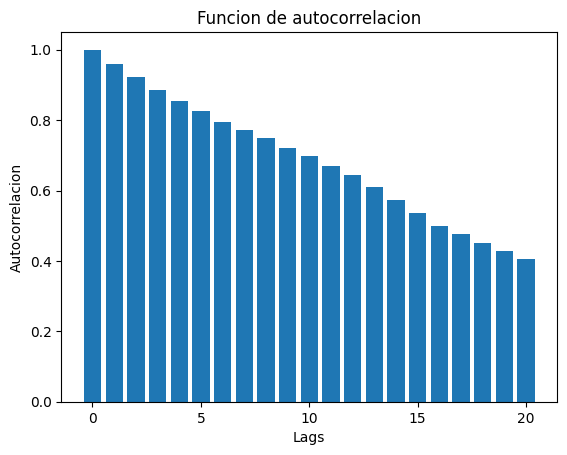

In [2]:
# CORRER EL CODIGO

# Simulacion de serie 1
np.random.seed(0)
tiempo = np.arange(0, 100)
estacionalidad = 10 * np.sin(2 * np.pi * tiempo / 12)
data_codigo_1 = 2 * tiempo + estacionalidad + np.random.randn(100) * 5

# Calculo de la función de autocorrelación
lags_maximos = 20
autocorr = acf(data_codigo_1, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

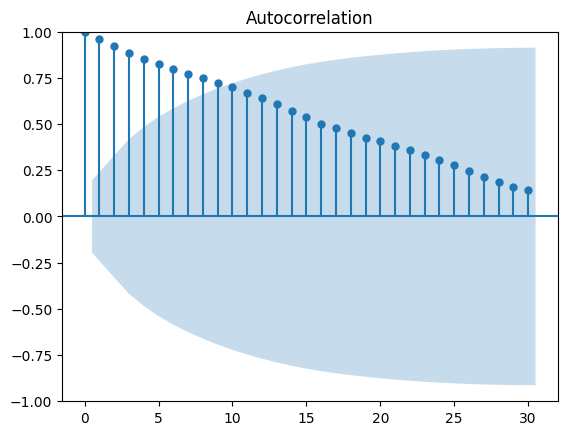

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_codigo_1, lags=30)
plt.show()

En el gráfico de autocorrelacion (ACF), los lags caen lentamente, lo que sugiere que la serie no es estacionaria.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns




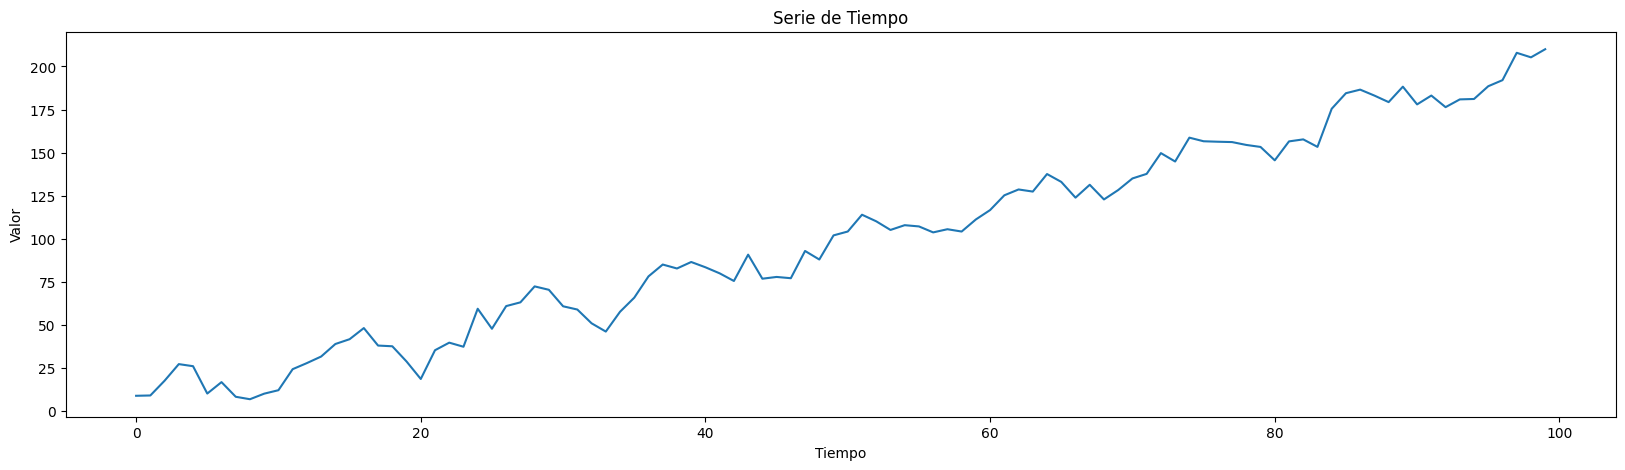

In [12]:
plt.figure(figsize=(20, 5))  # Establece el tamaño de la figura
plt.plot(tiempo, data_codigo_1)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')
plt.show()

 Una serie de tiempo se considera estacionaria si cumple con las siguientes propiedades:

Media constante: La media de la serie debe ser constante a lo largo del tiempo. Esto significa que la serie no presenta una tendencia clara en el valor promedio.

Varianza constante: La varianza de la serie también debe ser constante. Esto implica que la dispersión de los datos alrededor de la media no cambia con el tiempo.

Del gráfico, se observa que las medias y varianzas no son constantes, por lo que la serie es no estacionaria.

 <h3> CODIGO 2 </h3>

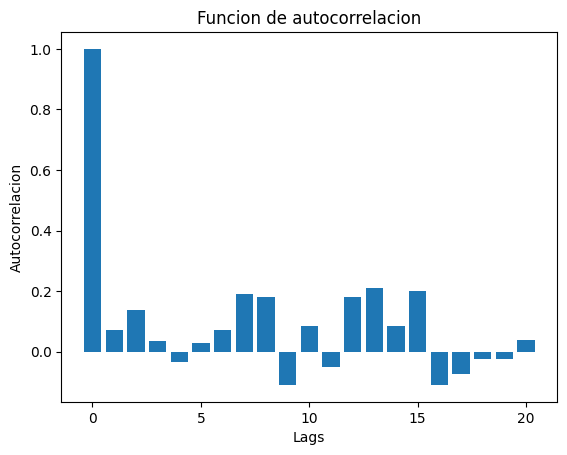

In [14]:
# CORRER EL CODIGO

# Simulacion de serie 2
np.random.seed(0)
data_codigo_2 = np.random.randn(100)

# Calculo de la función de autocorrelación
autocorr = acf(data_codigo_2, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

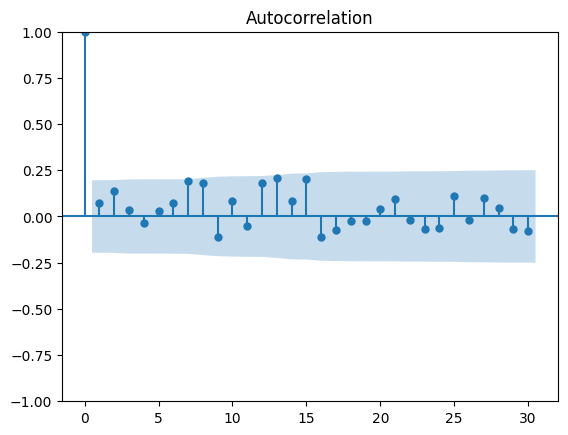

In [15]:
plot_acf(data_codigo_2, lags=30)
plt.show()

Decrecimiento rápido de la ACF: Si el gráfico de ACF muestra un decaimiento rápido y alcanza valores cercanos a cero después de unos pocos rezagos (lags), esto sugiere que la serie es estacionaria. En otras palabras, la autocorrelación entre los valores de la serie disminuye rápidamente y no hay patrones de larga duración en los datos.

Oscilación alrededor de cero: En una serie estacionaria, la ACF generalmente oscila alrededor de cero y no muestra patrones claros. Puedes observar picos positivos y negativos, pero no deberían ser persistentes a medida que aumenta el rezago.

Por lo expuesto, sugerimos que la serie es ESTACIONARIA

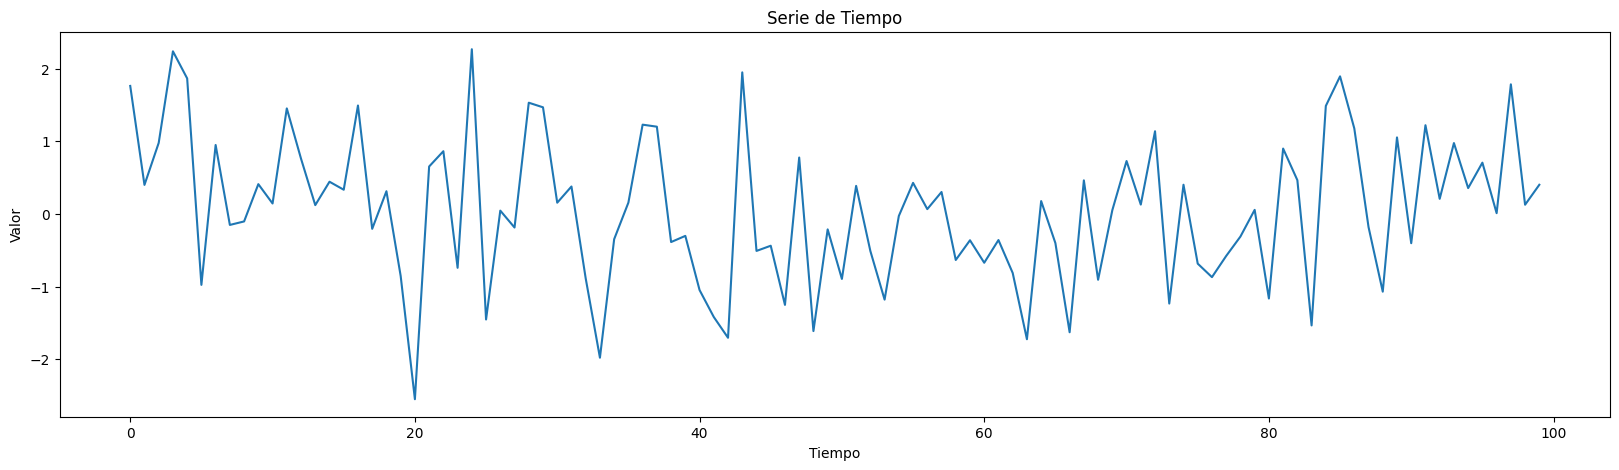

In [16]:
plt.figure(figsize=(20, 5))  # Establece el tamaño de la figura
plt.plot(tiempo, data_codigo_2)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie de Tiempo')
plt.show()

Luego de graficar la serie, podemos observar en principio, la presencia de estacionariedad.



---



---


#  **SEGUNDA PARTE**



---



---



## **Buscar un data set público de interés, descargarlo, importarlo y seguir las consignas.**



---


### **1) Leer la base y configurar la/s variables de interes como serie/s de tiempo.**


---



In [33]:
import pandas as pd


delimitador = ';'

# Ruta completa al archivo CSV
ruta_archivo = '/content/sample_data/DOLAR_HIST.csv'

# Carga el archivo CSV en un DataFrame
dolar = pd.read_csv(ruta_archivo,delimiter=delimitador)



In [34]:
dolar.head(10)

,Fecha cotizacion,Compra,Venta
0,04/01/2021,835,895
1,05/01/2021,838,898
2,06/01/2021,838,898
3,07/01/2021,840,900
4,08/01/2021,840,900
5,11/01/2021,843,903
6,12/01/2021,845,905
7,13/01/2021,845,905
8,14/01/2021,848,908
9,15/01/2021,848,908


## **Adaptamos el dataset para trabajarlo segun sus series temporales.**
#### Este paso es fundamental. El campo día tiene que ser del tipo datetime y no object

In [37]:
dolar.rename(columns={'Fecha cotizacion': 'Fecha'}, inplace=True)


In [38]:
dolar.Fecha = pd.to_datetime(dolar.Fecha, dayfirst = True)

In [40]:
# Convierte las columnas "compra" y "venta" a tipo float
dolar['Compra'] = dolar['Compra'].astype(float)
dolar['Venta'] = dolar['Venta'].astype(float)

In [39]:
dolar.dtypes

Fecha     datetime64[ns]
Compra           float64
Venta            float64
dtype: object

### Chequeo que no hayan valores faltantes

In [41]:
dolar.isna().sum()

Fecha     0
Compra    0
Venta     0
dtype: int64

---

---




### **2) Graficar la/s variable/s en el tiempo.</li>**



---



---



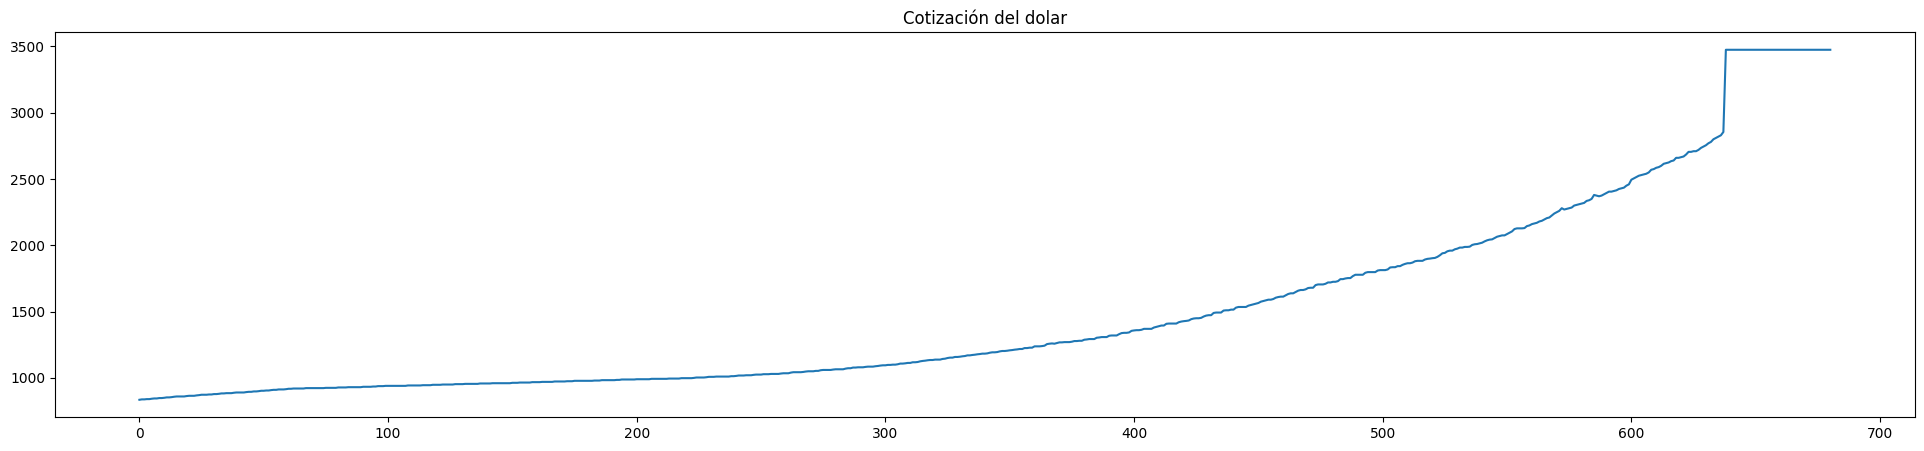

In [42]:
dolar.Compra.plot(figsize=(24,5), title="Cotización del dolar")
plt.show()



---



---


### **3) Graficar el Correlograma y analizar su comportamiento.**



---



---



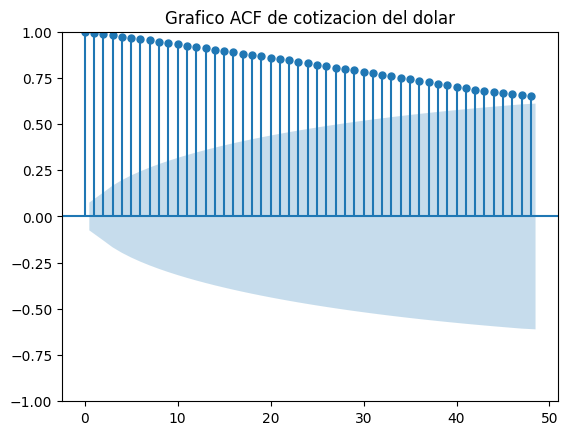

In [44]:
plot_acf(dolar.Compra, lags=48)
plt.title("Grafico ACF de cotizacion del dolar")
plt.show()

No estacionariedad: Si el ACF no disminuye rápidamente y muestra patrones cíclicos o sinusoidales, es probable que la serie de tiempo no sea estacionaria. Las autocorrelaciones significativas en varios lags indican que la serie de tiempo conserva información pasada y no es estacionaria.

En el caso de ejemplo, la serie parece ser NO estacionaria




---



---


### **4) Realizar Estadística Descriptiva de la/s variable/s.**



---



---



In [45]:
print(dolar['Compra'].describe())

count     681.000000
mean     1510.615272
std       726.119591
min       835.000000
25%       973.000000
50%      1183.000000
75%      1865.000000
max      3475.000000
Name: Compra, dtype: float64


**count:** El número de observaciones en la serie de tiempo es 681.

**mean:** La media (promedio) de la serie de tiempo es aproximadamente 1510.62. Esto significa que, en promedio, el valor de "Compra" es de alrededor de 1510.62 unidades.

**std:** La desviación estándar es aproximadamente 726.12. La desviación estándar mide la dispersión de los datos alrededor de la media. En este caso, una desviación estándar de 726.12 indica que los valores de "Compra" tienden a variar en promedio alrededor de 726.12 unidades con respecto a la media.

**min:** El valor mínimo de "Compra" en la serie de tiempo es 835.00. Esto es el valor más bajo observado en la serie.

**25%:** El percentil 25 (Q1) es 973.00. Esto significa que el 25% de las observaciones tienen un valor de "Compra" igual o inferior a 973.00.

**50%:** La mediana (percentil 50) es 1183.00. Esto es el valor que divide la serie de tiempo en dos partes iguales, con el 50% de las observaciones por debajo y el 50% por encima.

**75%:** El percentil 75 (Q3) es 1865.00. Esto significa que el 75% de las observaciones tienen un valor de "Compra" igual o inferior a 1865.00.

**max:** El valor máximo de "Compra" en la serie de tiempo es 3475.00. Esto es el valor más alto observado en la serie.